In [3]:
import torch 

from torchvision import utils
from torchvision import models 
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt 


In [4]:
##Modelo Pre entrenado

In [5]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to C:\Users\aperniah/.cache\torch\checkpoints\inception_v3_google-1a9a5a14.pth
100%|██████████| 104M/104M [00:16<00:00, 6.53MB/s]


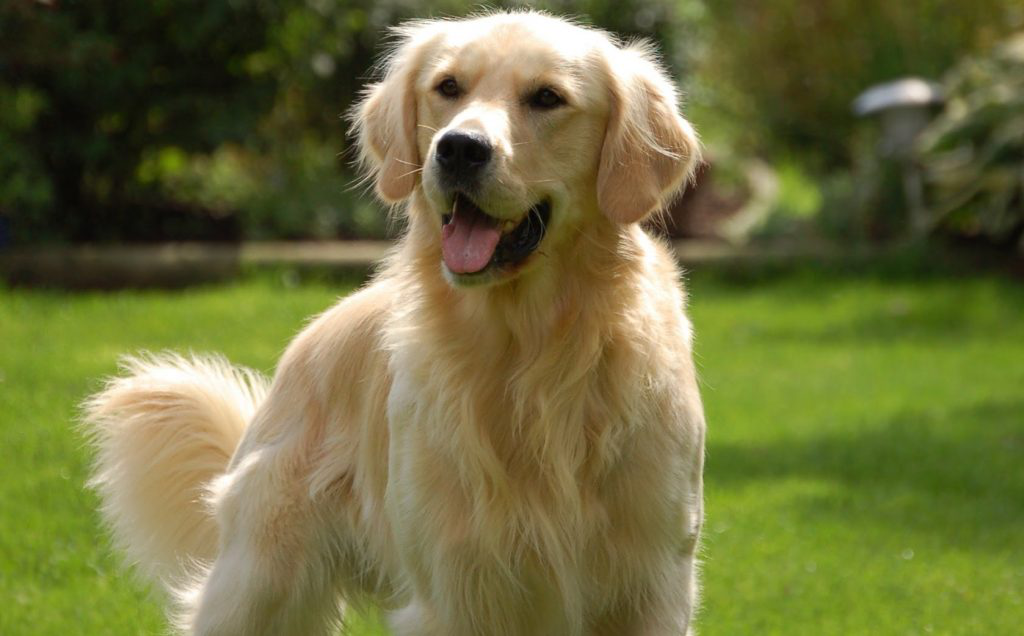

In [76]:
url = 'https://cdn.redcanina.es/wp-content/uploads/2019/02/12103726/golden-adulto-1024x636.jpg'
image = request.urlretrieve(url,'test.jpg')
img = Image.open(image[0])
img

In [77]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


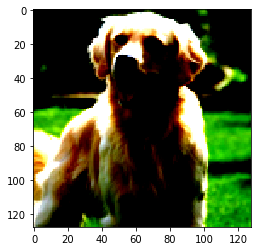

In [78]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t,0)

plt.imshow(img_t.permute(1,2,0))

In [79]:
#inception.eval()

In [80]:
out = inception(batch)
#out

In [81]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [82]:
#out

In [83]:
_, index = torch.max(out, 1)

torch.Size([1, 1000])

In [84]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 99.99256134033203)

In [85]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

golden retriever99.99256134033203
Saluki, gazelle hound0.0074353949166834354
English setter3.8375222288777877e-07
Irish setter, red setter1.517443770637783e-08
Afghan hound, Afghan4.979795242832097e-09
